# Projection Matrix

$P = X(X^TX)^{-1}X^T$

$P$ is a projection matrix: if you multiply a vector by $P$, you get back another vector of the same size, with two properties:

1. it will be in the column space of $X$
2. the new vector will be as close to the original vector as possible

Say there's no solution for $Xc=y$.

Solve $Xc=p$ instead, where $p=Py$.

## Fruit Example

In [25]:
import numpy as np
import pandas as pd

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [10,4,1],
    [10,4,1]
])
y = np.array([7,5,5,8,8.5]).reshape(-1,1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

$P = X(X^TX)^{-1}X^T$

In [11]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [12]:
p = P @ y
p

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

## Scatter Example

In [31]:
x = np.random.normal(5, 2, size=(10,1))
y = 2*x + np.random.normal(size=x.shape)
y

array([[-1.84064214],
       [10.67517476],
       [10.24625263],
       [17.17733854],
       [ 9.86454239],
       [ 7.20223621],
       [ 9.04857908],
       [ 5.7588964 ],
       [13.45638759],
       [13.70414257]])

In [32]:
x.reshape(-1)

array([-0.90657367,  4.95510863,  5.64960809,  8.29177271,  5.09703736,
        3.33869154,  4.70798169,  2.51375374,  7.05195426,  6.09172426])

In [33]:
y.reshape(-1)

array([-1.84064214, 10.67517476, 10.24625263, 17.17733854,  9.86454239,
        7.20223621,  9.04857908,  5.7588964 , 13.45638759, 13.70414257])

In [37]:
df = pd.DataFrame({"x":x.reshape(-1), "y":y.reshape(-1)})
df.head()

,x,y
0,-0.906574,-1.840642
1,4.955109,10.675175
2,5.649608,10.246253
3,8.291773,17.177339
4,5.097037,9.864542


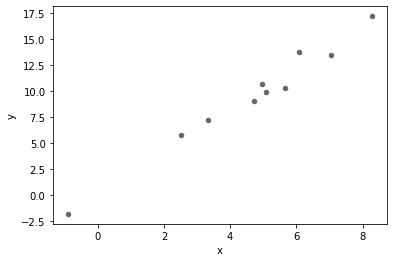

In [39]:
df.plot.scatter(x="x", y="y", c="0.4") # cannot find c, where y = x * c

In [42]:
P = x @ np.linalg.inv(x.T @ x) @ x.T
p = P @ y
p

array([[-1.83811206],
       [10.04666826],
       [11.45479192],
       [16.8118796 ],
       [10.33443409],
       [ 6.7693221 ],
       [ 9.54560913],
       [ 5.09672982],
       [14.29810128],
       [12.351199  ]])

In [43]:
df["p"] = p.reshape(-1)
df

,x,y,p
0,-0.906574,-1.840642,-1.838112
1,4.955109,10.675175,10.046668
2,5.649608,10.246253,11.454792
3,8.291773,17.177339,16.811880
4,5.097037,9.864542,10.334434
5,3.338692,7.202236,6.769322
6,4.707982,9.048579,9.545609
7,2.513754,5.758896,5.096730
8,7.051954,13.456388,14.298101
9,6.091724,13.704143,12.351199


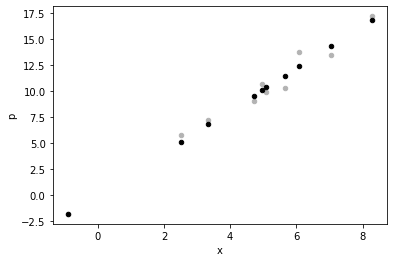

In [48]:
ax = df.plot.scatter(x="x", y="y", c="0.7") # cannot find c, where y = x @ c
df.plot.scatter(x="x", y="p", c="black", ax=ax) # CAN find c, where p = x @ c

In [49]:
df["p"]/df["x"]

0    2.027537
1    2.027537
2    2.027537
3    2.027537
4    2.027537
5    2.027537
6    2.027537
7    2.027537
8    2.027537
9    2.027537
dtype: float64